In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
import keras
import tensorflow as tf
from tensorflow.keras.models import load_model

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input, Flatten
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.regularizers import l2

import load_images

In [2]:
X_train, Y_train, X_validation, Y_validation, X_test, Y_test = load_images.getDataset()

In [3]:
# baseline 2_hidden layers fully connected
model = Sequential() 
model.add(Input(shape=(48,48,1)))
model.add(Dense(units = 200, activation='relu'))
model.add(Dense(units = 200, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.2)) # Including dropout layer helps avoid overfitting.
model.add(Dense(units=7 ,activation='softmax')) #output layer 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48, 48, 200)       400       
                                                                 
 dense_1 (Dense)             (None, 48, 48, 200)       40200     
                                                                 
 flatten (Flatten)           (None, 460800)            0         
                                                                 
 dropout (Dropout)           (None, 460800)            0         
                                                                 
 dense_2 (Dense)             (None, 7)                 3225607   
                                                                 
Total params: 3,266,207
Trainable params: 3,266,207
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
    optimizer= Adam(learning_rate=0.001), 
    metrics=['accuracy']
)
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = 'models/2_layers_fullyConnected_model', 
        save_freq = 'epoch' ,
        save_best_only = True
    )
]


In [5]:
history = model.fit(X_train, Y_train,batch_size=128,epochs=10, validation_data=(X_validation, Y_validation),callbacks = callbacks)


Epoch 1/10
169/169 [==============================] - 204s 1s/step - loss: 1.8513 - accuracy: 0.2937 - val_loss: 1.6748 - val_accuracy: 0.3412
Epoch 2/10
169/169 [==============================] - 186s 1s/step - loss: 1.6396 - accuracy: 0.3644 - val_loss: 1.6347 - val_accuracy: 0.3624
Epoch 3/10
169/169 [==============================] - 183s 1s/step - loss: 1.5994 - accuracy: 0.3816 - val_loss: 1.6235 - val_accuracy: 0.3730
Epoch 4/10
169/169 [==============================] - 184s 1s/step - loss: 1.5762 - accuracy: 0.3970 - val_loss: 1.6238 - val_accuracy: 0.3664
Epoch 5/10
169/169 [==============================] - 185s 1s/step - loss: 1.5498 - accuracy: 0.4064 - val_loss: 1.6194 - val_accuracy: 0.3645
Epoch 6/10
169/169 [==============================] - 184s 1s/step - loss: 1.5247 - accuracy: 0.4174 - val_loss: 1.6298 - val_accuracy: 0.3687
Epoch 7/10
169/169 [==============================] - 184s 1s/step - loss: 1.5015 - accuracy: 0.4325 - val_loss: 1.6375 - val_accuracy: 0.3776

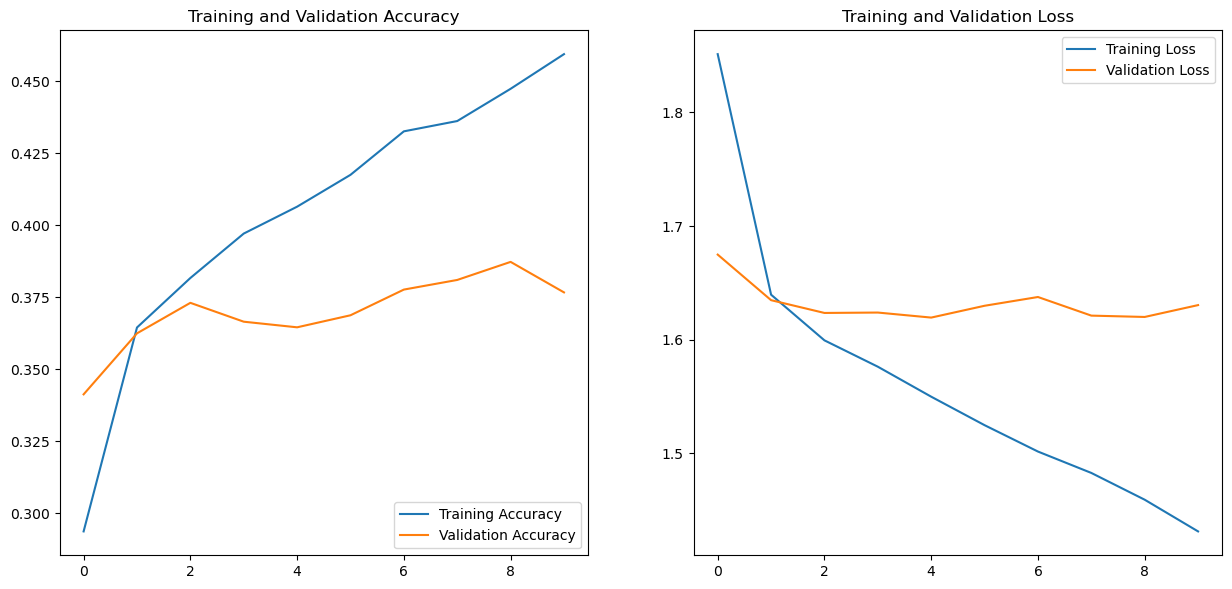

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [10]:
# best model prediction on test data
del(model)
model = load_model('models/2_layers_fullyConnected_model')
prediction = model.predict(X_test) # for each datapoint, gives a (1,7) vector contains probabilities

225/225 [==============================] - 22s 98ms/step


In [11]:
Y_prediction = np.argmax(prediction,axis = 1) # get the index(label) of highest probability for each 
prediction_accuracy = np.mean(Y_prediction==Y_test)
print("The accuracy on test data is: ", prediction_accuracy)

The accuracy on test data is:  0.3787963220952912
